<a href="https://colab.research.google.com/github/Lucas-Abrahao/Alura-Machine-Learning/blob/main/Machine_Learning_lidando_com_dados_de_muitas_dimensoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
resultados_exames = pd.read_csv('/content/exames.csv')
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [5]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123147
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico)

In [6]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
520,9.295,13.90,59.96,103.78,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,...,67.84,326.6,0.1850,0.2097,0.09996,0.786,0.07262,0.3681,0.08982,0.505731
464,13.170,18.22,84.28,103.78,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,95.10,687.6,0.1282,0.1965,0.18760,0.786,0.10450,0.2235,0.06925,NaN
70,18.940,21.31,123.60,103.78,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,...,165.90,1866.0,0.1193,0.2336,0.26870,0.786,0.17890,0.2551,0.06589,NaN
72,17.200,24.52,114.20,103.78,929.4,0.10710,0.18300,0.16920,0.07944,0.1927,...,151.60,1681.0,0.1585,0.7394,0.65660,0.786,0.18990,0.3313,0.13390,NaN
370,16.350,23.29,109.00,103.78,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,...,129.30,1165.0,0.1415,0.4665,0.70870,0.786,0.22480,0.4824,0.09614,NaN


In [7]:
treino_y.head()

520    B
464    B
70     M
72     M
370    M
Name: diagnostico, dtype: object

In [8]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print(classificador.score(teste_x, teste_y))

ValueError: ignored

In [11]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

quantos porcento de valores nulos temos na coluna exame_33

In [12]:
419/569

0.7363796133567663

como a maioria é nula podemos excluir a coluna

In [16]:
SEED = 123147
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns = 'exame_33')

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)

print("Resultados da Classificação %.2f%%" %(classificador.score(teste_x, teste_y)*100))

Resultados da Classificação 96.49%


In [17]:
from sklearn.dummy import DummyClassifier

SEED = 123147
random.seed(SEED)

classificador_dummy = DummyClassifier(strategy = 'most_frequent')
classificador_dummy.fit(treino_x, treino_y)

print("Resultados da Classificação do Dummy %.2f%%" %(classificador_dummy.score(teste_x, teste_y)*100))

Resultados da Classificação do Dummy 64.91%


In [27]:
dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis = 1)
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


In [28]:
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


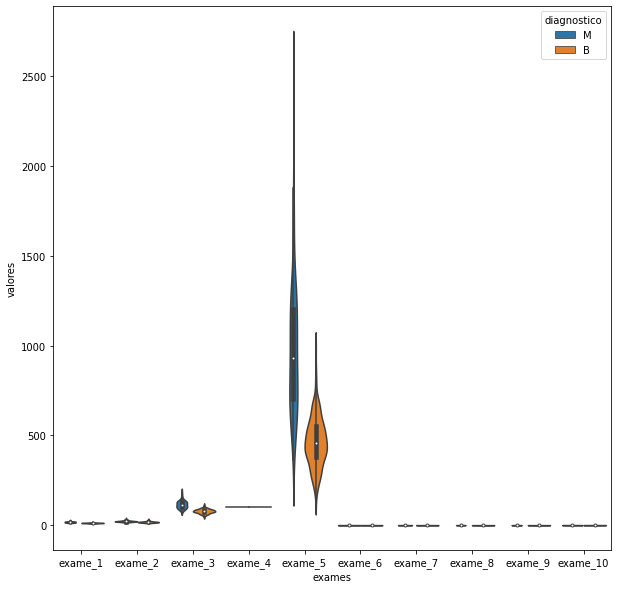

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))

ax = sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot)

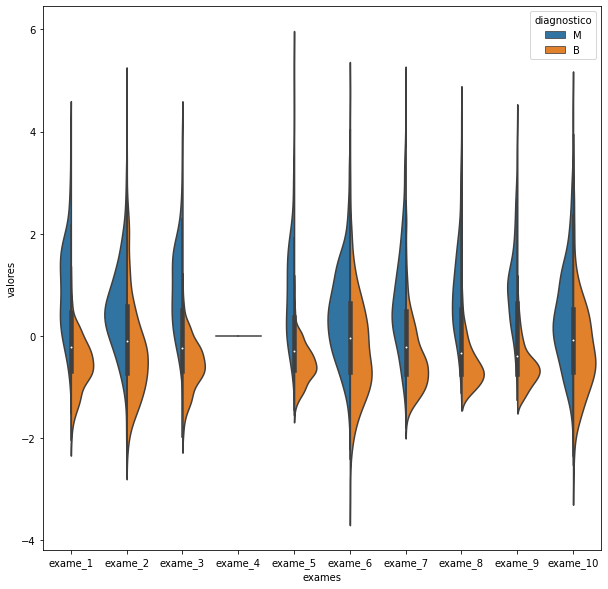

In [32]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)

valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns =  valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

plt.figure(figsize = (10,10))

ax = sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split = True)


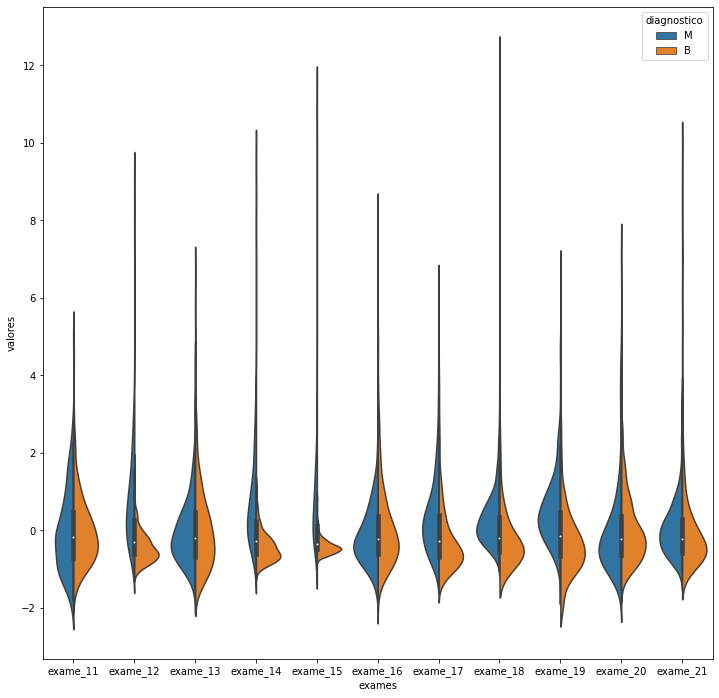

In [35]:
def grafico_violino(valores, inicio, fim):

  dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,inicio:fim]], axis = 1)
  dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

  plt.figure(figsize = (12,12))

  ax = sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split = True)

grafico_violino(valores_exames_v2,10,21)

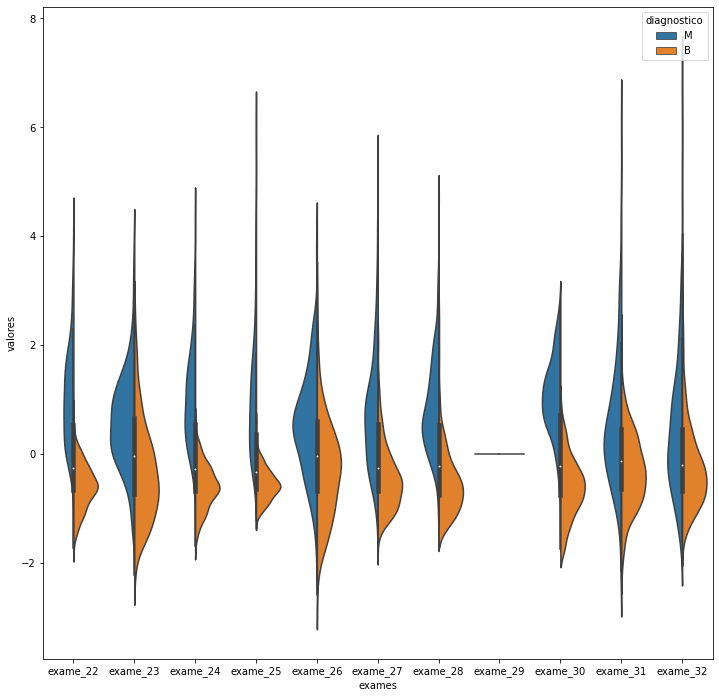

In [36]:
grafico_violino(valores_exames_v2,21,32)

removendo as duas variaveis constantes

In [37]:
valores_exames_v3 = valores_exames_v2.drop(columns = ['exame_4','exame_29'])

def classificar(valores):

  SEED = 1234
  random.seed(SEED)

  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)

  classificador = RandomForestClassifier(n_estimators = 100)
  classificador.fit(treino_x, treino_y)

  print("Resultados da Classificação %.2f%%" %(classificador.score(teste_x, teste_y)*100))

classificar(valores_exames_v3)

Resultados da Classificação 92.98%


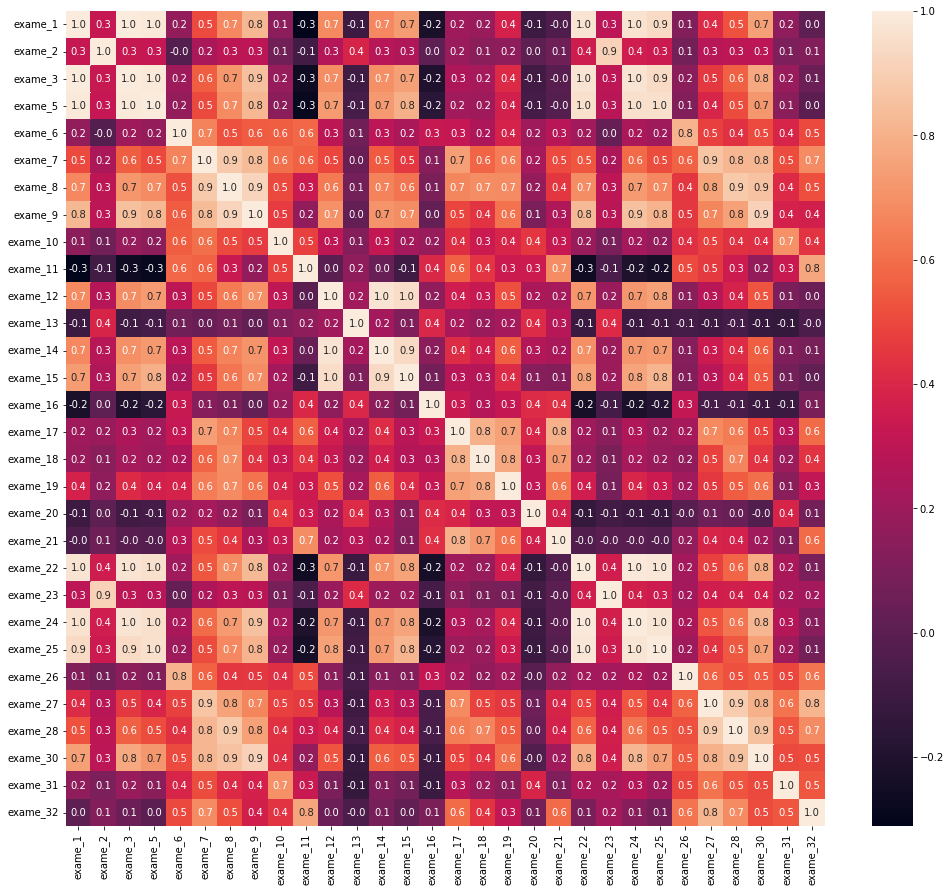

In [39]:
matriz_corr = valores_exames_v3.corr()

plt.figure(figsize = (17,15))
sns.heatmap(matriz_corr, annot = True, fmt = '.1f')

In [40]:
matriz_corr_v1 = matriz_corr[matriz_corr > 0.99]
matriz_corr_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
matriz_corr_v2 = matriz_corr_v1.sum()

In [42]:
matriz_corr_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [45]:
variaveis_corr = matriz_corr_v2[matriz_corr_v2 > 1]
variaveis_corr

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

excluindo as variaveis altamente correlacionadas

In [46]:
valores_exames_v4 = valores_exames_v3.drop(columns = variaveis_corr.keys())
valores_exames_v4

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,...,-1.138416,0.167980,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,...,-0.189161,-0.490556,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,...,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,...,0.326634,0.904057,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [47]:
classificar(valores_exames_v4)

Resultados da Classificação 91.81%


In [48]:
valores_exames_v5 = valores_exames_v3.drop(columns = ['exame_3', 'exame_24'])
valores_exames_v5

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [49]:
classificar(valores_exames_v5)

Resultados da Classificação 92.98%


In [62]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kmelhores = SelectKBest(chi2, k = 5)

In [63]:
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnostico, test_size = 0.3)

  kmelhores.fit(treino_x, treino_y)

ValueError: ignored

In [64]:
valores_exames_v6 = valores_exames_v1.drop(columns = (['exame_3','exame_4', 'exame_24', 'exame_29']))

In [65]:
valores_exames_v6.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,17.99,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.006193,25.38,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.003532,24.99,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.004571,23.57,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.009208,14.91,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.005115,22.54,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [66]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

kmelhores.fit(treino_x, treino_y)

treino_kbest = kmelhores.transform(treino_x)
teste_kbest = kmelhores.transform(teste_x)

In [67]:
treino_kbest.shape

(398, 5)

In [68]:
teste_kbest.shape

(171, 5)

In [69]:
classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_kbest, treino_y)

print("Resultados da Classificação %.2f%%" %(classificador.score(teste_kbest, teste_y)*100))

Resultados da Classificação 92.40%


In [70]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

In [71]:
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(22.5, 0.5, 'Real'), Text(0.5, 4.5, 'Predição')]

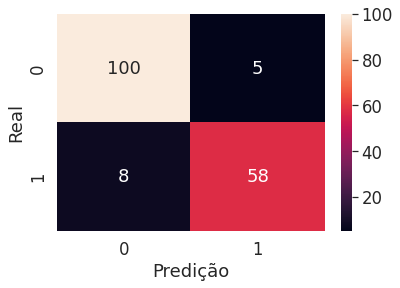

In [77]:
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

Resultados da Classificação 90.06%


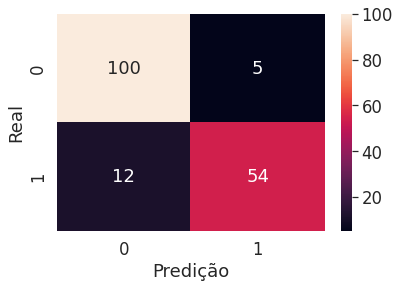

In [78]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_x, treino_y)

selecionar_rfe = RFE(estimator = classificador, n_features_to_select = 5,step = 1)
selecionar_rfe.fit(treino_x, treino_y)

treino_rfe = selecionar_rfe.transform(treino_x)
teste_rfe = selecionar_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))

sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

print("Resultados da Classificação %.2f%%" %(classificador.score(teste_rfe, teste_y)*100))



Resultados da Classificação 92.98%


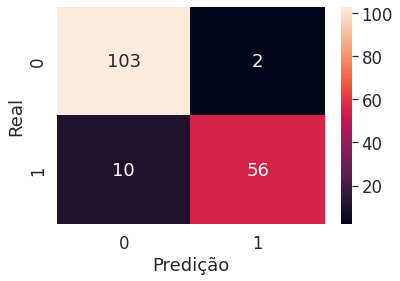

In [81]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_x, treino_y)

selecionar_rfecv = RFECV(estimator = classificador, cv = 5 ,step = 1, scoring = 'accuracy')
selecionar_rfecv.fit(treino_x, treino_y)

treino_rfecv = selecionar_rfecv.transform(treino_x)
teste_rfecv = selecionar_rfecv.transform(teste_x)

classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))

sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

print("Resultados da Classificação %.2f%%" %(classificador.score(teste_rfecv, teste_y)*100))

In [82]:
selecionar_rfecv.n_features_

26

In [84]:
treino_x.columns[selecionar_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [85]:
valores_exames_v6.shape

(569, 28)

In [86]:
selecionar_rfecv.grid_scores_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.85      , 0.8875    , 0.8625    , 0.89873418, 0.84810127],
       [0.9375    , 0.9375    , 0.9625    , 0.93670886, 0.88607595],
       [0.925     , 0.95      , 0.95      , 0.97468354, 0.93670886],
       [0.9125    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.9375    , 0.9625    , 0.98734177, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.97468354, 0.93670886],
       [0.925     , 0.975     , 0.975     , 0.98734177, 0.94936709],
       [0.9125    , 0.9625    , 0.95      , 0.97468354, 0.93670886],
       [0.925     , 0.9625    , 0.975     , 0.96202532, 0.93670886],
       [0.9375    , 0.975     , 0.9625    , 0.98734177, 0.93670886],
       [0.95      , 0.9625    , 0.9625    , 0.98734177, 0.94936709],
       [0.9625    , 0.95      , 0.975     , 0.98734177, 0.94936709],
       [0.95      , 0.9625    , 0.975     , 0.98734177, 0.93670886],
       [0.95      , 0.95      , 0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


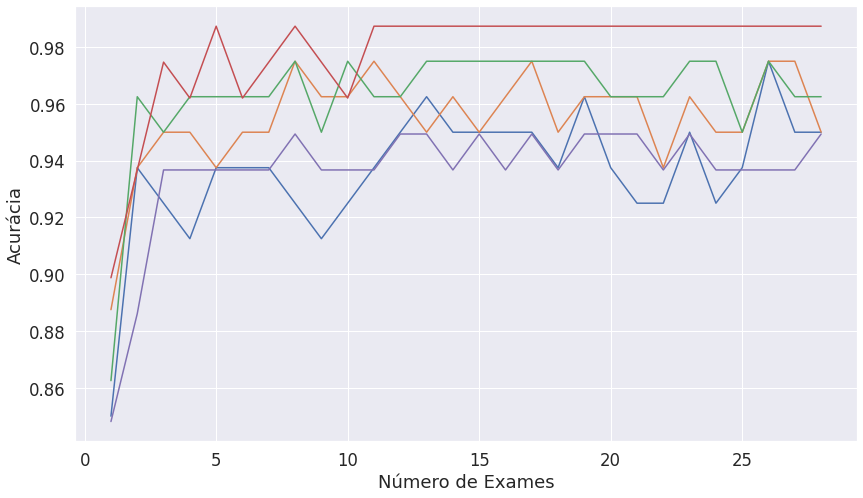

In [88]:
plt.figure(figsize = (14,8))

plt.xlabel('Número de Exames')
plt.ylabel('Acurácia')

plt.plot(range(1, len(selecionar_rfecv.grid_scores_) +1), selecionar_rfecv.grid_scores_)
plt.show()

In [89]:
resultados_exames

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [96]:
selecionar_rfe = RFE(estimator = classificador, n_features_to_select = 2,step = 1)
selecionar_rfe.fit(treino_x, treino_y)

RFE(estimator=RandomForestClassifier(random_state=1234), n_features_to_select=2)

In [97]:
valores_exames_v7 = selecionar_rfe.transform(valores_exames_v6)

In [98]:
valores_exames_v7.shape

(569, 2)

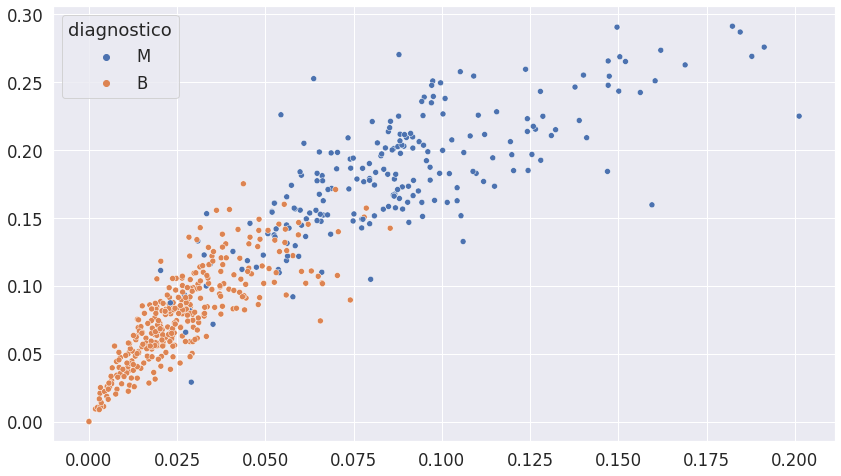

In [100]:
plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico,)

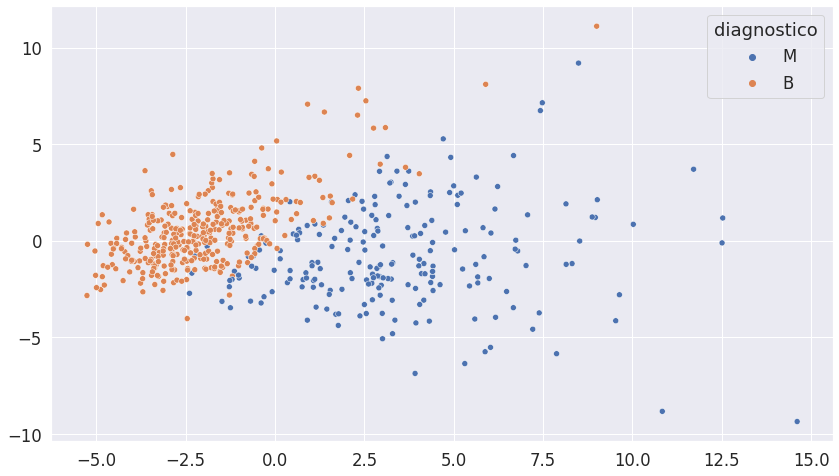

In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico,)

In [102]:
valores_exames_v8

array([[1157.37688421, -293.81017696],
       [1267.4687997 ,   15.91568628],
       [ 994.05000153,   39.07405468],
       ...,
       [ 313.54257115,   47.32093974],
       [1121.40671014,   33.68512999],
       [-769.01504719,  -87.76799118]])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


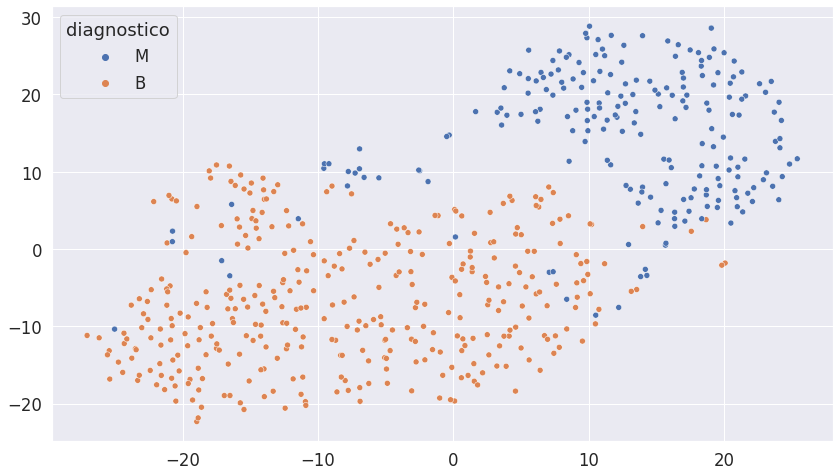

In [105]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico,)